In [1]:
import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('svg') # set it here to 'png' or 'svg'

import seaborn as sns
#sns.set()


In [14]:
actions = pd.read_csv("logs/actions.csv")
people = pd.read_csv("logs/people.csv")

# dataframe containing only the people who have been 'recognised' by the robot
users = people.loc[(people["user_id"] != -1) & (people["user_id"] != 0)]

In [16]:
people

,time,level,person_id,user_id,x,y,z
0,1.619616e+09,INFO,2047,-1,1.125,-0.218,1.739
1,1.619616e+09,INFO,2047,-1,1.348,0.236,1.688
2,1.619616e+09,INFO,2047,0,1.474,0.373,1.723
3,1.619616e+09,INFO,2047,0,1.495,0.239,1.750
4,1.619616e+09,INFO,2047,0,1.477,0.241,1.755
...,...,...,...,...,...,...,...
10698,1.619707e+09,INFO,33228,0,0.838,0.518,1.484
10699,1.619707e+09,INFO,33228,0,0.823,0.715,1.548
10700,1.619707e+09,INFO,33228,0,1.239,1.825,1.651
10701,1.619707e+09,INFO,33228,0,1.582,2.109,1.716


# How long people interacted with the robot?

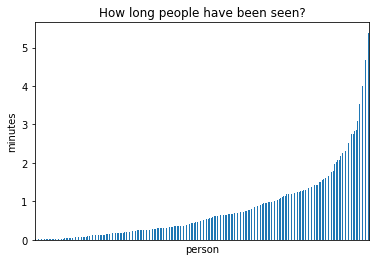

In [4]:
((people.groupby(["person_id"])["time"].max() - people.groupby(["person_id"])["time"].min())/60).sort_values().plot.bar(title="How long people have been seen?", ylabel="minutes",xticks=[],xlabel="person")


Descriptive stats on duration of tracking:

In [11]:
((people.groupby(["person_id"])["time"].max() - people.groupby(["person_id"])["time"].min())).describe()

count    217.000000
mean      48.910278
std       56.806102
min        0.826601
25%       10.997359
50%       29.096198
75%       68.931663
max      323.221093
Name: time, dtype: float64

Percentage of people who were 'recognised' by the robot (ie, assigned a `user_id`):

In [19]:
len(users)/len(people) * 100

37.21386527141923

# Where were the people?

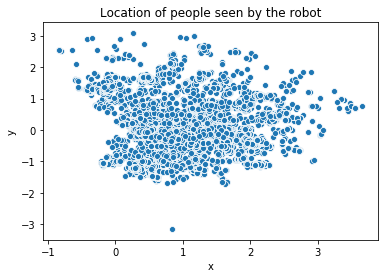

In [25]:
_ = sns.scatterplot(people.x, people.y).set_title("Location of people seen by the robot")

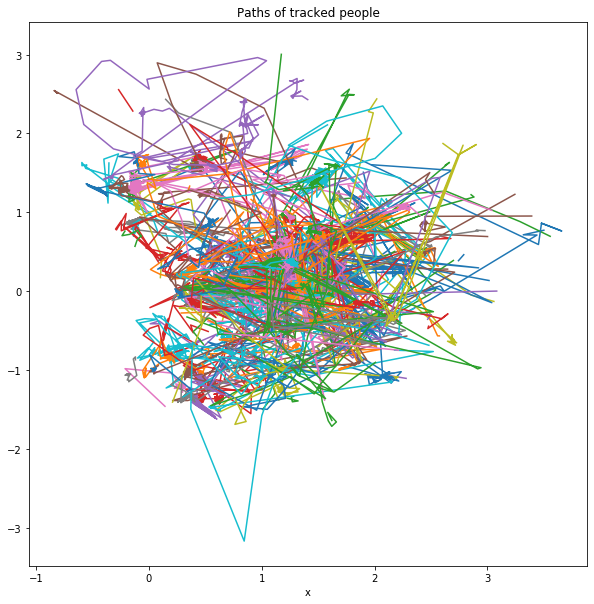

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
_ = people.groupby("person_id").plot.line("x", "y", ax=ax,legend=False,title="Paths of tracked people")

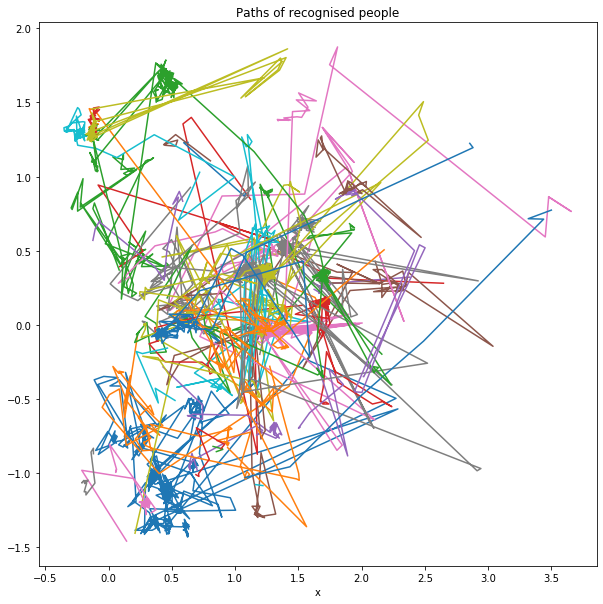

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
_ = users.groupby("user_id").plot.line("x", "y", ax=ax,legend=False, title="Paths of recognised people")